<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 6

_**Group Members:**_

### Problem 0 (3 points)

## Part 1: The Logistic and the Softmax

### Problem 1.1 (Exam Style)

### Problem 1.2 (Exam Style)

## Part 2: The Soft-Max and Cross-Entropy

### Problem 2.1

In [4]:
import numpy as np
def scores(a):
    e_a = np.exp(a)
    e_minus_a = np.exp(-a)
    denominator = e_a + e_minus_a
    second_value = e_a / denominator
    first_value = e_minus_a / denominator
    result = np.column_stack((first_value, second_value))

    return result
    
    
def cross_entropy(y, p):
    y = np.squeeze(y)
    loss = - (y * np.log(p[:, 1]) + (1 - y) * np.log(p[:, 0]))

    return loss

def a_loss(y,a):
    p = scores(a)
    return cross_entropy(y,p)

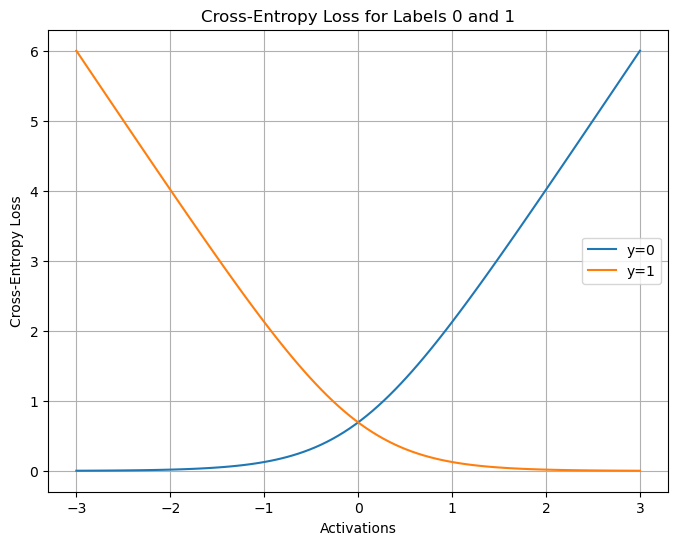

In [5]:
import numpy as np
import matplotlib.pyplot as plt

activations = np.linspace(-3, 3, 100)
zeros_vector = np.zeros_like(activations)
ones_vector = np.ones_like(activations)
loss_label_0 = a_loss(zeros_vector, activations)

loss_label_1 = a_loss(ones_vector, activations)

plt.figure(figsize=(8, 6))
plt.plot(activations, loss_label_0, label='y=0')
plt.plot(activations, loss_label_1, label='y=1')
plt.xlabel('Activations')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy Loss for Labels 0 and 1')
plt.legend()
plt.grid(True)
plt.show()


### Problem 2.2 (Exam Style)

$l_0(a) = -\ln(\frac{e^{-a}}{e^{-a}+e^{a}})$

$l_0(a) = \ln(\frac{e^{-a}+e^{a}}{e^{-a}})$

$l_0(a) = \ln({e^{-a}+e^{a}}) +\ln(\frac{1}{{e^{-a}}})$

$l_0(a) = \ln({e^{-a}+e^{a}}) +a$

As $a$ approaches infinity, $e^{-a}+e^a$ approaches $e^a$, so we get:

$l_0(a) = \ln({e^{a}}) + a$


$l_0(a) = 2a$

This is the linear function, and at the limit of infinity we get infinity.

As a approaches negative infinity, $e^{-a}+e^a$ approaches $e^a$, so we get:

$l_0(a) = a - a$

$l_0(a) = 0$
This is our linear function and at the limit of negative infinity we get zero. 

## Part 3: The General Logistic-Regression Classifier 

In [113]:
import urllib.request
import ssl
from os import path as osp
import shutil

In [114]:
def retrieve(file_name, semester='fall23', homework=6):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [115]:
retrieve('sgd.py')
from sgd import sgd, step

Using previously downloaded file sgd.py


In [116]:
import pickle

file_name = 'classification_data.pkl'
retrieve(file_name, homework=5)
with open(file_name, 'rb') as file:
    datasets = pickle.load(file)

retrieve('show_data.py', homework=5)
from show_data import show_data

Using previously downloaded file classification_data.pkl
Using previously downloaded file show_data.py


In [ ]:
#Soft max function takes the K activations and returns K soft maxes

### Problem 3.1

In [109]:
from autograd import numpy as anp

In [134]:
def activations(X,V):
    X_augmented = anp.insert(X, 0, 1, axis=1)
    result = anp.dot(X_augmented, V)
    return result

def losses(y, a):

    a_maxes = anp.max(a, axis=1, keepdims=True)
    b = a - a_maxes
    exp_b = anp.exp(b)
    sum_exp_b = anp.sum(exp_b, axis=1)
    log_sum_exp_b = anp.log(sum_exp_b)
    n, k = a.shape
    y_indices = anp.arange(n)
    b_y = b[y_indices, y]
    loss = -b_y + log_sum_exp_b
    return loss

    
def risk(V,T,beta):
    a = activations(T.x, V)
    l = losses(T.y, a)
    average = anp.mean(l)
    V_flat = V.ravel()
    square_norm = beta*anp.dot(V_flat, V_flat)
    return average + square_norm

    
def h(x,v):
    preds = activations(x,v)
    index_of_highest = anp.argmax(preds, axis=1)
    #vectorized version of classifier, takes one x and gives k activations
    return index_of_highest

def accuracy(v,t):
    predictions = h(t.x,v)
    
    correct_predictions = anp.sum(predictions == t.y)
    total_predictions = predictions.size
    accuracy = float(correct_predictions/total_predictions)

    return accuracy


In [144]:
T = datasets['2d']['multiclass']['general']


In [140]:
matrix = anp.zeros((3, 5), dtype = float)
T = datasets['2d']['multiclass']['general']
V = sgd(risk, matrix, T, 50, (10., 1.e-4), int(1.e3), 1.e-4, beta=1.e-5)

 31%|███       | 309/1000 [00:09<00:21, 32.10it/s]


The following show our results:

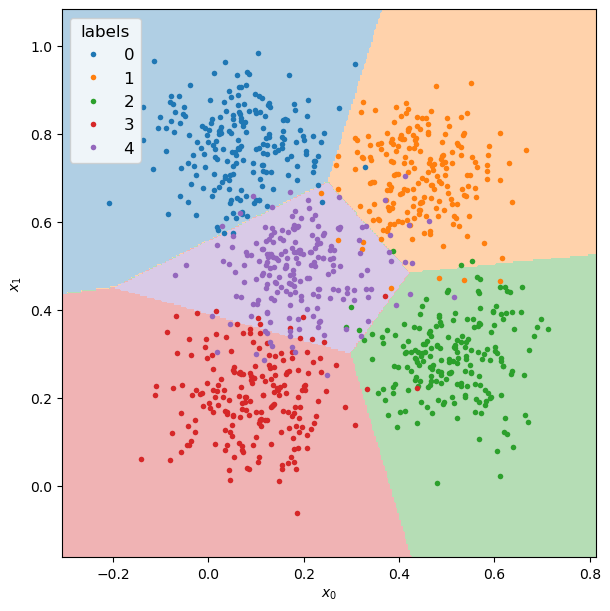

In [153]:
def closure(function, parameter):
    def f(argument):
        return function(argument, parameter)
    return f

h_closed = closure(h, V)
show_data(T, clf=h_closed)



Matrix V: [[-10.56 -12.3    2.77  15.04   5.05]
 [-19.57  16.4   20.08 -12.31  -4.6 ]
 [ 27.32  16.92 -17.35 -26.23  -0.65]]
Accuracy: 0.944


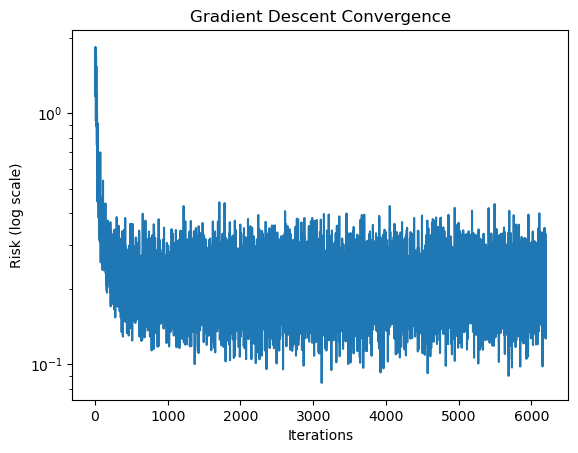

In [156]:
anp.set_printoptions(precision=2)
print("Matrix V:", V)
print("Accuracy:", accuracy(V,T))
history = step.history()
history[history == 0] = 1.e-16
iterations = np.arange(len(history))
plt.semilogy(iterations, history)
plt.xlabel('Iterations')
plt.ylabel('Risk (log scale)')
plt.title('Gradient Descent Convergence')

plt.show()

### Problem 3.2 (Exam Style)

If the training set is not linearly seperable then it is impossible to have a risk of zero. This is because there is no way to set the matrix V without having some incorrect predictions.

### Problem 3.3 (Exam Style)

1. This reasoning is wrong because the matrix V changes at each batch, so the V used to compute the overally risk. We ideally are getting more accurate as we iterate through batches.
2. $L_e$ is likely to be smaller because it is computed using our final V and thus the predictions are likely to be our most accurate.

## Part 4: Cross-Validation 

### Problem 4.1

In [158]:
from sklearn.linear_model import LogisticRegression

In [157]:
file_name = 'mnist.pickle'
retrieve(file_name, homework=2)

with open(file_name, 'rb') as file:
    mnist = pickle.load(file)

Downloaded file mnist.pickle


In [165]:
from sklearn.model_selection import KFold
def cross_validation(t, c_values, n_folds):
    accuracy_array = []
    A = float("-inf")
    variance = 0
    optimal_c = 0
    for C_value in c_values:
        s = 0
        kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
        folds_accuracies = []
        for fold, (train_indices, test_indices) in enumerate(kf.split(t.x, t.y)):
            train_x, train_y = t.x[train_indices], t.y[train_indices]
            test_x, test_y = t.x[test_indices], t.y[test_indices]
            lr_model = LogisticRegression(max_iter=10000, C=C_value)
            lr_model.fit(train_x, train_y)
            accuracy = lr_model.score(test_x, test_y)
            folds_accuracies.append(accuracy)
            s = s + accuracy
        avg = s/n_folds
        accuracy_array.append(avg)
        if avg > A:
            A = avg
            variance = np.var(folds_accuracies)
            optimal_c =  C_value
    best_h = LogisticRegression(max_iter=10000, C=optimal_c) 
    best_h.fit(t.x, t.y)
    h_accuracy = best_h.score(t.x, t.y)
    return best_h, h_accuracy, variance, accuracy_array
    

Elapsed Time: 27.88 seconds


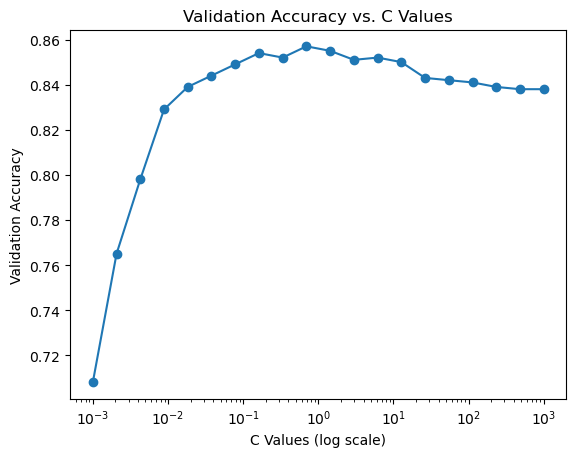

In [166]:
import time
t, c_values, n_folds = mnist.train, np.logspace(-3, 3, num=20), 3
start_time = time.time()
best_h, h_accuracy, variance, accuracy_array = cross_validation(t, c_values, n_folds)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
plt.semilogx(c_values, accuracy_array, marker='o')
plt.xlabel('C Values (log scale)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. C Values')

# Show the plot
plt.show()

In [167]:
print("best_c:", best_h.C)
print("validation_accuracy: ",h_accuracy)
print("empirical variance:", variance)
print("accuracy on test set:" , best_h.score(mnist.test.x, mnist.test.y))

best_c: 0.6951927961775606
validation_accuracy:  0.999
empirical variance: 0.00021941111887237842
accuracy on test set: 0.8642028985507246
